# Import

## Import library

In [1]:
import os
import sys
import warnings
from tqdm import tqdm_notebook as tqdm 

import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# 현재 jupyter 위치를 PROJECT_DIR 추가
PROJECT_DIR = os.path.abspath(os.path.join(os.path.realpath('__file__'), '..'))
sys.path.insert(0, PROJECT_DIR)
DATA_DIR = PROJECT_DIR + '/data' # 데이터 위치 
print(DATA_DIR)

C:\Users\lime1\Documents\study\Python\project/data


## import

네이버 뉴스에서 크롤링한 뉴스데이터 엑셀파일을 사용하고자 합니다.  
- 'BTS' 또는 '방탄소년단'에 관한 2020년 전체 네이버 뉴스

In [3]:
data_df = pd.read_excel(DATA_DIR +'/news_df_210205_v03.xlsx')
data_df.head(2)

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...


데이터는 media, date, title, article_original, url로 구성되어 있습니다.

# EDA

## 데이터 파일 확인

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             871 non-null    object
 1   date              871 non-null    object
 2   title             871 non-null    object
 3   article_original  863 non-null    object
 4   url               871 non-null    object
dtypes: object(5)
memory usage: 34.1+ KB


article_original에 None이 존재합니다.

In [5]:
print('article_orginal --- None 개수: ', data_df.article_original.isna().sum())
data_df.loc[data_df.article_original.isna()]

article_orginal --- None 개수:  8


,media,date,title,article_original,url
167,중앙일보,2020-03-22,민기자야 BTS 기사 쓴 기자가 직접 자기 기사 댓글 읽었다,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
221,조선일보,2020-05-15,사진 BTS RM이 남긴 미술관 방명록쉽지 않은 시기 같이 이겨내요,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
415,한겨레,2020-09-02,영상 BTS 빌보드 핫 100 1위온라인 글로벌 기자간담회,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
417,경향신문,2020-09-02,BTS Makes It over the Final Billboard Threshold,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
675,한겨레,2020-10-14,BTS 소속사의 주식 상장이 논란에 싸인 이유 간단정리 공모주 내손안의Q 19,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
678,경향신문,2020-10-14,Will BTS Be Allowed to Postpone Enrollment Mil...,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
738,중앙일보,2020-11-02,Hot Poll 방탄소년단 병역특례에 대한 중앙일보 온라인 핫 폴 결과,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...
774,경향신문,2020-11-20,불행했지만 행복했던 한해 좌절 이겨낸 힘은 멤버들 BTS 글로벌 기자간담회 일문일답,NaN,https://news.naver.com/main/read.nhn?mode=LSD&...


### - 사용 데이터 정리

기사 본문이 존재하지 않는 8개의 기사는 삭제하고자 합니다.

In [6]:
data_df.dropna(inplace=True)

In [7]:
data_df.iloc[411:418]

,media,date,title,article_original,url
413,경향신문,2020-09-02,방탄소년단 소속사 빅히트 10월 코스피 상장 추진,경향신문 \n \n\n\n\n\n 방탄소년단 BTS 의 소속사 빅히트 엔터테인먼트가...,https://news.naver.com/main/read.nhn?mode=LSD&...
414,조선일보,2020-09-02,이규탁의 팝월드 강남 스타일이 개척한 길 BTS가 질주했다,방탄소년단은 이미 앨범 차트 ‘빌보드 200’에 넉 장의 앨범을 잇따라 1위에 올리...,https://news.naver.com/main/read.nhn?mode=LSD&...
416,중앙일보,2020-09-02,BTS 수백억대 주식부호 되나멤버 1인당 빅히트 주식 92억,방탄소년단 BTS 소속사 빅히트엔터테인먼트가 상장을 추진하면서 멤버들이 백억대 주식...,https://news.naver.com/main/read.nhn?mode=LSD&...
418,경향신문,2020-09-02,다음은 그래미 이왕이면 BTS 단독 무대,경향신문 \n \n\n\n\n\n\n\n “제일 좋은 상장…너무 행복해”\n \n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
419,중앙일보,2020-09-03,새벽 소식 듣고 7시까지 울어 BTS가 전한 빌보드 1위 순간,“보고 있는 빌보드 페이지가 진짜가 맞나 너무 의심되더라고요. 좋은 멤버들 회사 스...,https://news.naver.com/main/read.nhn?mode=LSD&...
420,조선일보,2020-09-03,BTS는 패션 교과서 트렌드 바꿨다,뮤비 의상에 해외 매체들 열광… 캉골모자 등 검색 2배 이상 증가\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
421,조선일보,2020-09-03,증여세도 다이너마이트방탄BTS 최소 280억 세금 낼 듯,3일 여의도 증권가는 10월 상장을 앞두고 있는 BTS 방탄소년단 소속사인 빅히트엔...,https://news.naver.com/main/read.nhn?mode=LSD&...


415,417번 기사가 삭제되었는데 인덱스가 변경되지 않아 인덱스 접근이 어렵습니다.  
인덱스를 reset하고 기존 인덱스는 drop 합니다.

In [8]:
data_df.reset_index(drop=True, inplace=True)
data_df.iloc[411:418]

,media,date,title,article_original,url
411,경향신문,2020-09-02,방탄소년단 소속사 빅히트 10월 코스피 상장 추진,경향신문 \n \n\n\n\n\n 방탄소년단 BTS 의 소속사 빅히트 엔터테인먼트가...,https://news.naver.com/main/read.nhn?mode=LSD&...
412,조선일보,2020-09-02,이규탁의 팝월드 강남 스타일이 개척한 길 BTS가 질주했다,방탄소년단은 이미 앨범 차트 ‘빌보드 200’에 넉 장의 앨범을 잇따라 1위에 올리...,https://news.naver.com/main/read.nhn?mode=LSD&...
413,중앙일보,2020-09-02,BTS 수백억대 주식부호 되나멤버 1인당 빅히트 주식 92억,방탄소년단 BTS 소속사 빅히트엔터테인먼트가 상장을 추진하면서 멤버들이 백억대 주식...,https://news.naver.com/main/read.nhn?mode=LSD&...
414,경향신문,2020-09-02,다음은 그래미 이왕이면 BTS 단독 무대,경향신문 \n \n\n\n\n\n\n\n “제일 좋은 상장…너무 행복해”\n \n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
415,중앙일보,2020-09-03,새벽 소식 듣고 7시까지 울어 BTS가 전한 빌보드 1위 순간,“보고 있는 빌보드 페이지가 진짜가 맞나 너무 의심되더라고요. 좋은 멤버들 회사 스...,https://news.naver.com/main/read.nhn?mode=LSD&...
416,조선일보,2020-09-03,BTS는 패션 교과서 트렌드 바꿨다,뮤비 의상에 해외 매체들 열광… 캉골모자 등 검색 2배 이상 증가\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
417,조선일보,2020-09-03,증여세도 다이너마이트방탄BTS 최소 280억 세금 낼 듯,3일 여의도 증권가는 10월 상장을 앞두고 있는 BTS 방탄소년단 소속사인 빅히트엔...,https://news.naver.com/main/read.nhn?mode=LSD&...


기사를 날짜를 기준으로 정렬합니다.

In [9]:
data_df.sort_values(by=['date'], inplace=True)

In [10]:
data_df.head(3)

,media,date,title,article_original,url
0,조선일보,2020-01-02,150만명 몰린 타임스스퀘어 새해 무대도 BTS,2012년 싸이에 이어 두 번째… ABC방송 라이브 쇼에서 생중계\n \n\n\n\...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,조선일보,2020-01-02,방탄소년단 CNN 선정 2010년대 음악 변화시킨 아티스트,방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,조선일보,2020-01-03,방탄소년단 새앨범 작업중 새해도 K팝 인베이전 이어진다,트와이스 日 도쿄돔 공연 블랙핑크도 새앨범 예정\n \n\n\n 경자년 庚子年 새해...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [11]:
data_df.tail(3)

,media,date,title,article_original,url
860,조선일보,2020-12-29,코로나로 힘든 1년 트롯맨봉준호BTS 있어 웃고 울었다,2020년 잊을 수 없는 문화계의 10일\n \n\n 2020년은 한국 문화계의 저...,https://news.naver.com/main/read.nhn?mode=LSD&...
861,중앙일보,2020-12-30,박영선 삶은 아무 일 없단 듯 계속된다BTS 노래로 신년사,박영선 중소벤처기업부 장관은 30일 발표한 신년사에서 “이미 최선을 다 하고 계신데...,https://news.naver.com/main/read.nhn?mode=LSD&...
862,한겨레,2020-12-30,압도적 1위 BTS 916만장코로나에는 음반인 가요,코로나19 팬데믹으로 콘서트와 각종 음악 축제가 줄줄이 취소되는 등 올 한해 가요계...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   media             863 non-null    object
 1   date              863 non-null    object
 2   title             863 non-null    object
 3   article_original  863 non-null    object
 4   url               863 non-null    object
dtypes: object(5)
memory usage: 40.5+ KB


총 863개의 object 타입의 텍스트 문서가 있습니다.  
날짜를 기준으로 정렬하여 보면 2020년 1월 초부터 12월 말까지의 기사가 있는 것을 알 수 있습니다.

## media 분포

In [13]:
data_df['media'].value_counts()

중앙일보    294
조선일보    284
경향신문    185
한겨레     100
Name: media, dtype: int64

총 4개 media로부터 데이터가 구성되어 있습니다.

## 원문(article_original)

In [14]:
data_df['article_original'][1]

'방탄소년단 BTS 이 미국 CNN 선정 2010년대 음악을 변화시킨 10대 아티스트 에 선정됐다.\n \n\n 12월 31일 현지시각 CNN은 자신들의 음악 장르는 물론 스스로를 재창조하고 인상적인 영향력을 행사하면서 음악산업의 변화를 이끈 아티스트 톱 10을 선정해 발표했다.\n \n\n BTS는 비욘세 켄드릭 라마 프랭크 오션 레이디 가가 드레이크 메트로 부민 테일러 스위프트 솔란지 카니예 웨스트 등과 함께 톱 10에 뽑혔다.\n \n\n\n\n\n CNN은 BTS에 대해 K팝을 미국에 대중화시켰고 K팝을 주류음악 mainstream 으로 이끌었다 며 이들의 음악이 2010년대 말미에 부상한만큼 미국인들 사이에서 2020년대 K팝은 더 저변을 넓힐 수 있을 것 이라고 말했다.\n \n\n 이어 당신은 BTS의 음악을 전혀 들어보지 못했거나 그들의 빅 팬 중 한명일 수 있다 면서 그러나 어느 쪽이든 그들의 영향력을 부정할 수 없다 고 말했다.\n \n\n 그러면서 BTS가 2018년 러브 유어셀프 전 티어 LOVE YOURSELF 轉 Tear 로 K팝 앨범 최초로 미국 빌보드 200 차트에서 1위를 차지했으며 이후 한 해에 3차례나 빌보드 200차트 1위에 오른 사실을 강조하면서 미국을 포함해 전 세계에서 수백만장의 앨범 판매를 기록했다 고 소개했다.\n \n\n CNN은 2009년 원더걸스가 노바디 로 2012년 싸이가 강남 스타일 로 빌보드 차트에서 성과를 거뒀던 사실을 돌아보며 K팝은 늘 아시아에서 큰 인기를 누렸지만 미국 시장을 뚫기 위해 분투해왔다 며 BTS가 모두를 압도적으로 제쳤다 고 평가했다.\n \n\n 한편 방탄소년단은 이날 밤 뉴욕 타임스스퀘어에서 진행된 ABC방송의 새해맞이 라이브 무대 뉴 이어스 로킹 이브 2020 New Year s Rocking Eve 에 올라 K팝의 위용을 다시금 과시했다.\n \n\n 행사를 진행한 방송인 라이언 시크레스트는 전 지구를 홀린 그룹 이라고 소개했고 BTS는 8분간 히트곡 2곡을 선보이며 한국어 떼

article_original 데이터는 다음과 같습니다.
- 타입 : str
- 문장 내 \n (개행문자) 포함, 문장 단위 토큰화 안됨

# 날짜 별 기사 수 분포 vs 네이버 검색양

날짜 별 기사 수와 네이버 검색양을 비교하고자 합니다.

#### 네이버 검색양 데이터 확인

In [15]:
search_data = pd.read_excel(DATA_DIR + '/bts_search_datalab.xlsx')
search_data.rename(columns={'amount':'search_amount'}, inplace=True)
search_data.head()

,date,search_amount
0,2020-01-01,43.85227
1,2020-01-02,22.75566
2,2020-01-03,17.47025
3,2020-01-04,21.59224
4,2020-01-05,32.13055


In [16]:
search_data.tail()

,date,search_amount
361,2020-12-27,15.85755
362,2020-12-28,14.53832
363,2020-12-29,14.21533
364,2020-12-30,22.29620
365,2020-12-31,22.45266


In [17]:
search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           366 non-null    object 
 1   search_amount  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


네이버 검색양 데이터는 2020년 1월 1일부터 12월 31일까지 검색 값을 보여준다.

In [18]:
date_groupby = data_df.groupby(by='date').count()['article_original'].reset_index()
print(type(date_groupby))
date_groupby

<class 'pandas.core.frame.DataFrame'>


,date,article_original
0,2020-01-02,2
1,2020-01-03,2
2,2020-01-06,1
3,2020-01-07,3
4,2020-01-08,3
...,...,...
247,2020-12-24,2
248,2020-12-25,2
249,2020-12-26,3
250,2020-12-29,1


In [19]:
# 일자별 뉴스 건 수
news_amount_list =[]
for i in range(search_data.shape[0]):
    isin = False
    for j in range(date_groupby.shape[0]):
        if date_groupby['date'].loc[j] == search_data['date'].loc[i]:
            news_amount_list.append(date_groupby['article_original'].loc[j])
            isin = True
            break
        elif j == date_groupby.shape[0]-1 and isin == False:
            news_amount_list.append(0)
            
print(len(news_amount_list))
# news_amount_list

366


In [20]:
search_data['news_amount'] = pd.Series(news_amount_list)
search_data

,date,search_amount,news_amount
0,2020-01-01,43.85227,0
1,2020-01-02,22.75566,2
2,2020-01-03,17.47025,2
3,2020-01-04,21.59224,0
4,2020-01-05,32.13055,0
...,...,...,...
361,2020-12-27,15.85755,0
362,2020-12-28,14.53832,0
363,2020-12-29,14.21533,1
364,2020-12-30,22.29620,2


<AxesSubplot:xlabel='date'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


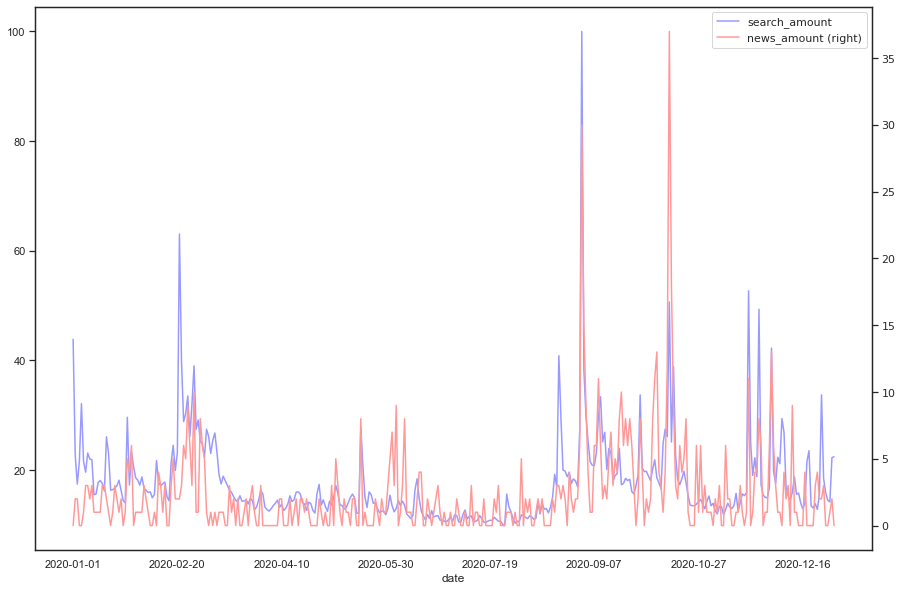

In [21]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic') 

search_data.plot(ax=ax, x='date', secondary_y = ['news_amount'], color = ['#9999ff','#ff9999'])

검색양과 기사의 분포가 유사하다는 것을 확인할 수 있습니다.

In [22]:
# None drop, date 순 정렬 파일저장
data_df.to_excel(DATA_DIR+'/news_df_210205_v03_dna.xlsx', index=False)